### Quiz 3 ###
Team: Phil Kim, Jeremiah Snow, Ryan Schuck

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('gss_cat.csv')
df.head()

,Unnamed: 0,year,marital,age,race,rincome,partyid,relig,denom,tvhours
0,1,2000,Never married,26.0,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12.0
1,2,2000,Divorced,48.0,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NaN
2,3,2000,Widowed,67.0,White,Not applicable,Independent,Protestant,No denomination,2.0
3,4,2000,Never married,39.0,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4.0
4,5,2000,Divorced,25.0,White,Not applicable,Not str democrat,None,Not applicable,1.0


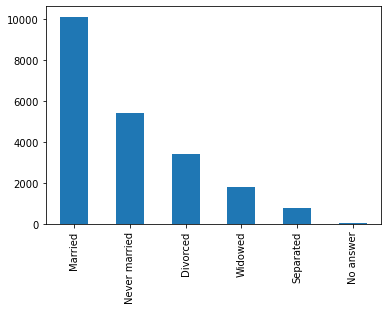

In [48]:
# (a) 
df['marital'].value_counts().plot(kind = "bar")
plt.show()

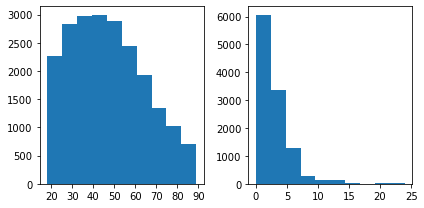

In [60]:
# (b) 
fig = plt.figure(figsize = (6, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(df.age)
ax1.set_xticks([20, 30, 40, 50, 60, 70, 80, 90])
ax2.hist(df.tvhours)
ax2.set_xticks([0, 5, 10, 15, 20, 25])
plt.tight_layout()

In [71]:
# (c-i) 
df.replace({'No answer': 'other', 
            'Don\'t know': 'other', 
            'Other party': 'other',
            'Strong republican': 'rep',
            'Not str republican': 'rep',
            'Ind,near rep': 'ind',
            'Independent': 'ind',
            'Ind,near dem': 'ind',
            'Not str democrat': 'dem',
            'Strong democrat': 'dem'},
          inplace = True)
df.head()

,Unnamed: 0,year,marital,age,race,rincome,partyid,relig,denom,tvhours
0,1,2000,Never married,26.0,White,$8000 to 9999,ind,Protestant,Southern baptist,12.0
1,2,2000,Divorced,48.0,White,$8000 to 9999,rep,Protestant,Baptist-dk which,NaN
2,3,2000,Widowed,67.0,White,Not applicable,ind,Protestant,No denomination,2.0
3,4,2000,Never married,39.0,White,Not applicable,ind,Orthodox-christian,Not applicable,4.0
4,5,2000,Divorced,25.0,White,Not applicable,dem,None,Not applicable,1.0


In [97]:
# (c-ii)
party = df.groupby(['year','partyid'])['partyid'].count().unstack()
party['sum'] = party.sum(axis = 1)
party['dem'] = party['dem'] / party['sum']
party['ind'] = party['ind'] / party['sum']
party['other'] = party['other'] / party['sum']
party['rep'] = party['rep'] / party['sum']
party.drop(['sum'], axis=1, inplace = True)

<AxesSubplot:xlabel='year'>

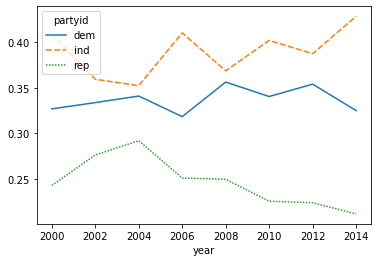

In [99]:
# (c-iii)
party.drop(['other'], axis=1, inplace = True)
sns.lineplot(data=party)